In [1]:
#importing the data set using pandas

import pandas as pd

df = pd.read_csv(r"Heart Fail Prediction.csv")

print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [2]:
#displaying feature name
print(df.iloc[0,:])

age                             75.0
anaemia                          0.0
creatinine_phosphokinase       582.0
diabetes                         0.0
ejection_fraction               20.0
high_blood_pressure              1.0
platelets                   265000.0
serum_creatinine                 1.9
serum_sodium                   130.0
sex                              1.0
smoking                          0.0
time                             4.0
DEATH_EVENT                      1.0
Name: 0, dtype: float64


In [3]:
features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 
           'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
X = df [features]
y = df ['DEATH_EVENT']

In [4]:
# let's first implement KNN algorithm with doing feature selection and lets see what it result in.

# spliting training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [5]:
#since features = 12, so first we are going to generate model for k = 13

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 13)


# training the model using the training sets

classifier.fit(X_train, y_train)

#predicting output

y_pred = classifier.predict(X_test)


In [6]:
print(y_pred)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
#lets do model evaluation
from sklearn import metrics

print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

accuracy:  0.7


In [8]:
# lets see how value of k effects the accuracy

ac = []
k = []
for i in range (20):
    i+=1
    classifier = KNeighborsClassifier(n_neighbors = i)


    # training the model using the training sets

    classifier.fit(X_train, y_train)

    #predicting output
    k.append(i)
    y_pred = classifier.predict(X_test)
    
    accurt = metrics.accuracy_score(y_test, y_pred)

    ac.append(accurt)
    
print('acuuracy', ac)

print('\n value of k', k)
    

acuuracy [0.5111111111111111, 0.7, 0.5666666666666667, 0.6888888888888889, 0.6333333333333333, 0.7, 0.6555555555555556, 0.6555555555555556, 0.6333333333333333, 0.7, 0.6777777777777778, 0.6888888888888889, 0.7, 0.7111111111111111, 0.7, 0.6888888888888889, 0.7, 0.6888888888888889, 0.7111111111111111, 0.6888888888888889]

 value of k [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [9]:
# we see that maximum accuracy is 66.66% and at corresponding value of 10 & 11

# let's see it again with k = 10

classifier = KNeighborsClassifier(n_neighbors = 10)


# training the model using the training sets

classifier.fit(X_train, y_train)

#predicting output

y_pred = classifier.predict(X_test)

print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

accuracy:  0.7


In [10]:
# now lets try to improve the performance of the model by doing feature selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func = chi2, k = 6)
fit = bestfeatures.fit(X, y) #applying the chi2 rule
dfcolumns = pd.DataFrame(X.columns)
dfscores = pd.DataFrame(fit.scores_)

#for better visualization, concatinating two dataframes

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['specifications', 'score'] # naming the dataframe columns
print('\n 6 Best Features are: \n \n', featureScores.nlargest(6, 'score')) # printig best 6 features


 6 Best Features are: 
 
               specifications         score
6                  platelets  26135.771990
11                      time   3826.892661
2   creatinine_phosphokinase   1897.314839
4          ejection_fraction     79.072541
0                        age     44.619455
7           serum_creatinine     19.814118


In [11]:
#selecting features with index 6, 11, 2, 4, and 0..opps! lets not keep time as a feature

features = ['platelets', 'creatinine_phosphokinase', 'ejection_fraction', 'age']
X = df[features]
# y is already defined, no need to change it here

print(X)


     platelets  creatinine_phosphokinase  ejection_fraction   age
0    265000.00                       582                 20  75.0
1    263358.03                      7861                 38  55.0
2    162000.00                       146                 20  65.0
3    210000.00                       111                 20  50.0
4    327000.00                       160                 20  65.0
..         ...                       ...                ...   ...
294  155000.00                        61                 38  62.0
295  270000.00                      1820                 38  55.0
296  742000.00                      2060                 60  45.0
297  140000.00                      2413                 38  45.0
298  395000.00                       196                 45  50.0

[299 rows x 4 columns]


In [12]:
# now lets use KNN modle with above data

# spliting training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [13]:
# lets see how value of k effects the accuracy

ac = []
k = []
for i in range (30):
    i+=1
    classifier = KNeighborsClassifier(n_neighbors = i)


    # training the model using the training sets

    classifier.fit(X_train, y_train)

    #predicting output
    k.append(i)
    y_pred = classifier.predict(X_test)
    
    accurt = metrics.accuracy_score(y_test, y_pred)

    ac.append(accurt)
    
print('acuuracy', ac)

print('\n value of k', k)
    

acuuracy [0.5888888888888889, 0.6, 0.5555555555555556, 0.5777777777777777, 0.5444444444444444, 0.6111111111111112, 0.5777777777777777, 0.5777777777777777, 0.5555555555555556, 0.5888888888888889, 0.6, 0.6111111111111112, 0.6, 0.6, 0.5888888888888889, 0.6111111111111112, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6333333333333333, 0.6333333333333333, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222, 0.6222222222222222]

 value of k [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


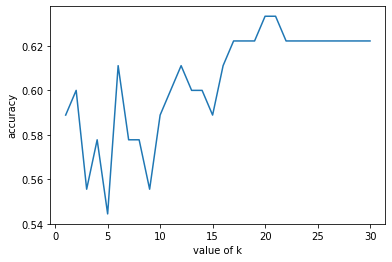

In [14]:
# plotting accuracy vs k-value

import matplotlib.pyplot as plt

plt.plot(k, ac)
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.show()

In [15]:
# lets keep k = 10

classifier = KNeighborsClassifier(n_neighbors = 10)


# training the model using the training sets

classifier.fit(X_train, y_train)

#predicting output

y_pred = classifier.predict(X_test)

print("accuracy: ", metrics.accuracy_score(y_test, y_pred))



accuracy:  0.5888888888888889


In [16]:
# hmm! not good accuracy! lets look more detaily into the data set again to see what is wrong with it

print(X)

     platelets  creatinine_phosphokinase  ejection_fraction   age
0    265000.00                       582                 20  75.0
1    263358.03                      7861                 38  55.0
2    162000.00                       146                 20  65.0
3    210000.00                       111                 20  50.0
4    327000.00                       160                 20  65.0
..         ...                       ...                ...   ...
294  155000.00                        61                 38  62.0
295  270000.00                      1820                 38  55.0
296  742000.00                      2060                 60  45.0
297  140000.00                      2413                 38  45.0
298  395000.00                       196                 45  50.0

[299 rows x 4 columns]


<AxesSubplot:xlabel='age'>

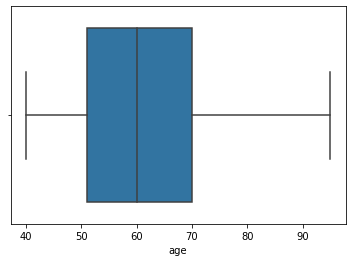

In [17]:
# box plotting

import seaborn as sns
sns.boxplot(x = df['age'])

In [18]:
# no proble with age

<AxesSubplot:xlabel='platelets'>

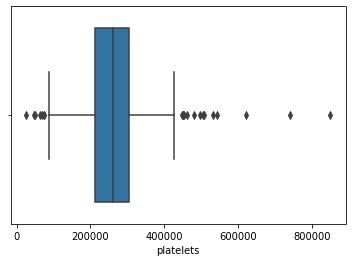

In [19]:
sns.boxplot(x = df['platelets'])

In [20]:
# lets remove outliers reasonably
df[df['platelets']>500000]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
105,72.0,1,328,0,30,1,621000.0,1.7,138,0,1,88,1
109,45.0,0,292,1,35,0,850000.0,1.3,142,1,1,88,0
117,85.0,1,102,0,60,0,507000.0,3.2,138,0,0,94,0
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205,0
240,70.0,0,81,1,35,1,533000.0,1.3,139,0,0,212,0
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0


In [21]:
# lets remove them

df= df[df['platelets']<500000]

In [22]:
#checking again
df[df['platelets']>500000]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


<AxesSubplot:xlabel='creatinine_phosphokinase'>

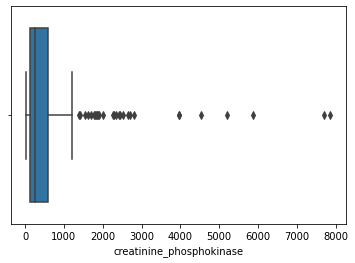

In [23]:
# we are good so far!

# lets look into creatinine_phosphokinase

sns.boxplot(x = df['creatinine_phosphokinase'])

In [24]:
# much more outliers
df[df['creatinine_phosphokinase']>3000]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
1,55.0,0,7861,0,38,0,263358.03,1.10,136,1,0,6,1
52,60.0,0,3964,1,62,0,263358.03,6.80,146,0,0,43,1
60,45.0,0,7702,1,25,1,390000.00,1.00,139,1,0,60,1
72,85.0,0,5882,0,35,0,243000.00,1.00,132,1,1,72,1
103,42.0,0,5209,0,30,0,226000.00,1.00,140,1,1,87,0
134,81.0,0,4540,0,35,0,231000.00,1.18,137,1,1,107,0
171,52.0,0,3966,0,40,0,325000.00,0.90,140,1,1,146,0


In [25]:
# lets remove them
df = df[df['creatinine_phosphokinase']<3000]

<AxesSubplot:xlabel='creatinine_phosphokinase'>

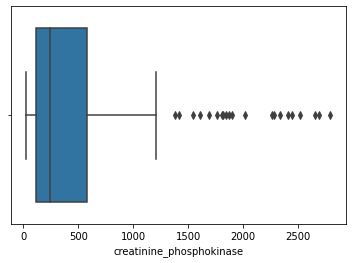

In [26]:
# now lets check again

sns.boxplot(x = df['creatinine_phosphokinase'])


In [27]:
# hmm! seems more outlier but as they are in large number, probably they are not outlier at all in the practical data, so let them how they are


<AxesSubplot:xlabel='ejection_fraction'>

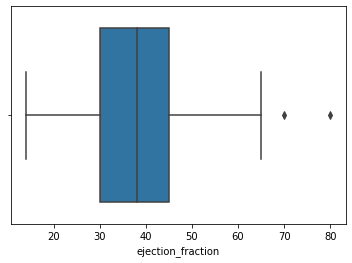

In [28]:
# for ejection_fraction

sns.boxplot(df['ejection_fraction'])

In [29]:
# lets remove outliers

df[df['ejection_fraction']>=70]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
64,45.0,0,582,0,80,0,263358.03,1.18,137,0,0,63,0
217,54.0,1,427,0,70,1,151000.00,9.00,137,0,0,196,1


In [30]:
# lets remove them
df = df[df['ejection_fraction']<70]

<AxesSubplot:xlabel='ejection_fraction'>

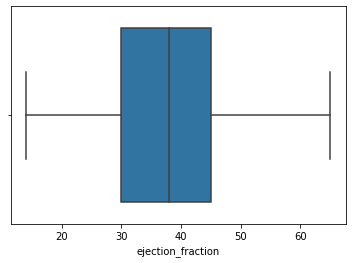

In [31]:
# lets cross check
sns.boxplot(df['ejection_fraction'])

In [33]:
#we are good here! and we are done in data cleaning part

# checking the accuracy again of the KNN model

# spliting training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)



In [36]:
# lets see how value of k effects the accuracy

ac = []
k = []
for i in range (50):
    i+=1
    classifier = KNeighborsClassifier(n_neighbors = i)


    # training the model using the training sets

    classifier.fit(X_train, y_train)

    #predicting output
    k.append(i)
    y_pred = classifier.predict(X_test)
    
    accurt = metrics.accuracy_score(y_test, y_pred)

    ac.append(accurt)
    
print('acuuracy', ac)

print('\n value of k', k)
    

acuuracy [0.5666666666666667, 0.6777777777777778, 0.5444444444444444, 0.6777777777777778, 0.6333333333333333, 0.6666666666666666, 0.6555555555555556, 0.6666666666666666, 0.5666666666666667, 0.6222222222222222, 0.5888888888888889, 0.6222222222222222, 0.6111111111111112, 0.6555555555555556, 0.6555555555555556, 0.6777777777777778, 0.6777777777777778, 0.7, 0.6444444444444445, 0.7222222222222222, 0.7, 0.7222222222222222, 0.7111111111111111, 0.7333333333333333, 0.7111111111111111, 0.7444444444444445, 0.7333333333333333, 0.7333333333333333, 0.7222222222222222, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333, 0.7333333333333333]

 value of k [1, 2, 

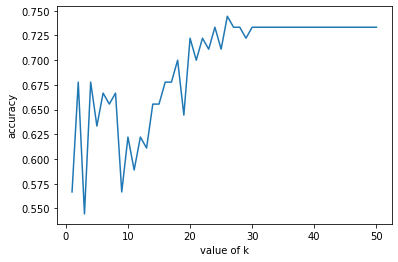

In [37]:
# plotting accuracy vs k-value

import matplotlib.pyplot as plt

plt.plot(k, ac)
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.show()

In [38]:
# lets keep k = 20; it may be compromised at processing speed but for the sake of maxium accuracy, lets take k = 20
# lets check again with k = 20

# lets keep k = 10

classifier = KNeighborsClassifier(n_neighbors = 20)


# training the model using the training sets

classifier.fit(X_train, y_train)

#predicting output

y_pred = classifier.predict(X_test)

print("accuracy: ", metrics.accuracy_score(y_test, y_pred))



accuracy:  0.7222222222222222


In [39]:
# how can I increase the performance of my KNN model even more?

# let's normalize the dataset

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print (X_train)

print (X_test)

[[ 1.86546628e+00 -2.25814124e-01 -6.49771052e-01  2.85933253e+00]
 [ 9.14252328e-02 -4.90955428e-01  1.79711453e+00 -3.41498161e-02]
 [-3.66090617e-01 -2.23784334e-02 -2.41956788e-01 -1.68756830e+00]
 [-3.28742385e-01  4.43874451e+00 -6.49771052e-01 -1.52222645e+00]
 [ 2.00717144e-02  1.19630741e+00 -2.41956788e-01 -8.60859057e-01]
 [-1.13172939e+00 -5.03387891e-02 -1.46539958e+00  1.61926866e+00]
 [ 2.26695979e+00 -2.23784334e-02 -1.05758532e+00 -1.99491664e-01]
 [-3.84764734e-01 -4.89991277e-01  1.79711453e+00  7.92559424e-01]
 [-2.44708861e-01 -2.60523531e-01 -2.41956788e-01  3.79204804e-01]
 [ 5.20929908e-01 -4.94812028e-01  1.79711453e+00  7.92559424e-01]
 [-1.19708879e+00 -4.53353570e-01  2.73177019e-03 -3.64833512e-01]
 [ 1.20253515e+00  6.84237094e+00 -1.05758532e+00 -1.27421368e+00]
 [-5.43494722e-01 -4.74564874e-01  1.79711453e+00  3.79204804e-01]
 [ 1.47447582e-01 -5.27593135e-01 -2.41956788e-01 -6.95517208e-01]
 [ 2.00717144e-02 -2.23784334e-02 -2.41956788e-01 -7.78188132e

In [40]:
# let's repeat every step once again
ac = []
k = []
for i in range (50):
    i+=1
    classifier = KNeighborsClassifier(n_neighbors = i)


    # training the model using the training sets

    classifier.fit(X_train, y_train)

    #predicting output
    k.append(i)
    y_pred = classifier.predict(X_test)
    
    accurt = metrics.accuracy_score(y_test, y_pred)

    ac.append(accurt)
    
print('acuuracy', ac)

print('\n value of k', k)
    


acuuracy [0.7111111111111111, 0.7666666666666667, 0.7777777777777778, 0.8, 0.8, 0.8, 0.8, 0.7777777777777778, 0.7777777777777778, 0.7555555555555555, 0.8111111111111111, 0.7666666666666667, 0.7777777777777778, 0.8, 0.8111111111111111, 0.8111111111111111, 0.8111111111111111, 0.7777777777777778, 0.8, 0.7888888888888889, 0.8, 0.7666666666666667, 0.7888888888888889, 0.7666666666666667, 0.7777777777777778, 0.7666666666666667, 0.7888888888888889, 0.7555555555555555, 0.7666666666666667, 0.7444444444444445, 0.7666666666666667, 0.7444444444444445, 0.7666666666666667, 0.7777777777777778, 0.7888888888888889, 0.7888888888888889, 0.7777777777777778, 0.7666666666666667, 0.7777777777777778, 0.7555555555555555, 0.7666666666666667, 0.7444444444444445, 0.7555555555555555, 0.7333333333333333, 0.7444444444444445, 0.7444444444444445, 0.7444444444444445, 0.7555555555555555, 0.7444444444444445, 0.7444444444444445]

 value of k [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23

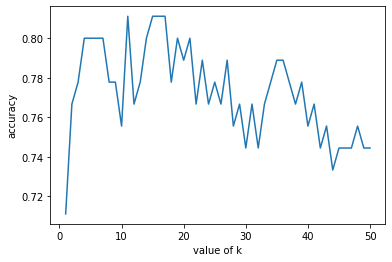

In [41]:
# plotting accuracy vs k-value

import matplotlib.pyplot as plt

plt.plot(k, ac)
plt.xlabel('value of k')
plt.ylabel('accuracy')
plt.show()

In [51]:
#Hmm! seems interesting! at k value around 11,the accuracy is very high. 
# let see for k = 11

classifier = KNeighborsClassifier(n_neighbors = 11)


# training the model using the training sets

classifier.fit(X_train, y_train)

#predicting output

y_pred = classifier.predict(X_test)

print("accuracy: ", metrics.accuracy_score(y_test, y_pred))

accuracy:  0.8111111111111111
